# Neural Network using tensorflow
for this model whe used some information from "https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/"

In [1]:
# import libraries
import tensorflow.keras as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [2]:
keggle = True

In [3]:
# load data
if keggle:
    test_df = pd.read_csv('data/keggle_test_data.csv')
    test_df = test_df.drop('Unnamed: 0', axis=1)

    train_df = pd.read_csv('data/keggle_train_data.csv')
    train_df = train_df.drop('Unnamed: 0', axis=1)

else:
    test_df = pd.read_csv('data/test_clean_data.csv')
    test_df = test_df.drop('Unnamed: 0', axis=1)

    train_df = pd.read_csv('data/train_clean_data.csv')
    train_df = train_df.drop('Unnamed: 0', axis=1)


display(test_df)
display(train_df)

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,0,0,0,0,1,0,0,0,0,0,...,-0.742060,-0.704493,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.816513,1.678499,5.387390
1,0,0,0,0,0,0,0,0,0,1,...,0.935952,-0.200579,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-1.184969,1.678499,5.278525
2,0,0,0,0,0,0,0,0,0,0,...,-0.742060,-0.704493,2.292105,-0.103134,-0.285354,-0.063031,-0.089422,-0.816513,1.678499,5.329398
3,0,0,0,0,0,0,0,0,0,1,...,0.500618,0.540470,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.816513,1.678499,5.245266
4,0,0,0,0,1,0,0,0,0,0,...,0.777649,-0.704493,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-1.553425,1.678499,5.234264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,0,0,0,0,0,0,0,0,0,0,...,-0.742060,1.148131,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.448057,-1.360118,5.214844
729,0,1,0,0,0,0,0,0,0,0,...,-0.742060,-0.704493,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.448057,-1.360118,4.899821
730,0,1,0,0,0,0,0,0,0,0,...,-0.742060,-0.200579,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.079602,-1.360118,4.900367
731,0,0,0,0,0,0,0,0,0,0,...,-0.108848,-0.230221,-0.358838,-0.103134,-0.285354,-0.063031,1.146786,0.288854,-1.360118,5.120574


,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,0,0,0,0,1,0,0,0,0,0,...,0.920121,0.214409,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.448057,1.678499,5.332438
1,0,0,0,0,1,0,0,0,0,0,...,0.366061,-0.704493,-0.358838,-0.103134,1.854530,-0.063031,-0.089422,-0.079602,1.678499,5.021189
2,0,0,0,0,1,0,0,0,0,0,...,2.368594,-0.170937,-0.358838,-0.103134,-0.285354,-0.063031,21.985725,-0.079602,1.678499,5.235528
3,0,0,0,0,0,0,0,0,0,1,...,2.107394,-0.170937,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.079602,1.678499,5.291147
4,0,0,0,0,0,0,0,0,0,0,...,-0.742060,0.510828,-0.358838,-0.103134,2.282507,-0.063031,-0.089422,-1.921881,1.678499,5.282169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,0,0,0,0,1,0,0,0,0,0,...,1.592909,-0.096832,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.448057,-1.360118,5.204120
2193,0,0,0,0,1,0,0,0,0,0,...,3.009721,-0.704493,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,1.025766,-1.360118,5.117271
2194,0,0,0,0,0,0,0,0,0,0,...,0.207758,-0.704493,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-1.184969,-1.360118,5.153815
2195,0,0,0,0,1,0,0,0,0,0,...,0.556024,-0.704493,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.079602,-1.360118,5.117271


In [4]:
# split data into input X and target Y
target_train = train_df['SalePrice']
target_test = test_df['SalePrice']

input_train = train_df.drop('SalePrice', axis=1)
input_test = test_df.drop('SalePrice', axis=1)

display(test_df)
display(train_df)

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,0,0,0,0,1,0,0,0,0,0,...,-0.742060,-0.704493,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.816513,1.678499,5.387390
1,0,0,0,0,0,0,0,0,0,1,...,0.935952,-0.200579,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-1.184969,1.678499,5.278525
2,0,0,0,0,0,0,0,0,0,0,...,-0.742060,-0.704493,2.292105,-0.103134,-0.285354,-0.063031,-0.089422,-0.816513,1.678499,5.329398
3,0,0,0,0,0,0,0,0,0,1,...,0.500618,0.540470,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.816513,1.678499,5.245266
4,0,0,0,0,1,0,0,0,0,0,...,0.777649,-0.704493,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-1.553425,1.678499,5.234264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,0,0,0,0,0,0,0,0,0,0,...,-0.742060,1.148131,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.448057,-1.360118,5.214844
729,0,1,0,0,0,0,0,0,0,0,...,-0.742060,-0.704493,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.448057,-1.360118,4.899821
730,0,1,0,0,0,0,0,0,0,0,...,-0.742060,-0.200579,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.079602,-1.360118,4.900367
731,0,0,0,0,0,0,0,0,0,0,...,-0.108848,-0.230221,-0.358838,-0.103134,-0.285354,-0.063031,1.146786,0.288854,-1.360118,5.120574


,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,0,0,0,0,1,0,0,0,0,0,...,0.920121,0.214409,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.448057,1.678499,5.332438
1,0,0,0,0,1,0,0,0,0,0,...,0.366061,-0.704493,-0.358838,-0.103134,1.854530,-0.063031,-0.089422,-0.079602,1.678499,5.021189
2,0,0,0,0,1,0,0,0,0,0,...,2.368594,-0.170937,-0.358838,-0.103134,-0.285354,-0.063031,21.985725,-0.079602,1.678499,5.235528
3,0,0,0,0,0,0,0,0,0,1,...,2.107394,-0.170937,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.079602,1.678499,5.291147
4,0,0,0,0,0,0,0,0,0,0,...,-0.742060,0.510828,-0.358838,-0.103134,2.282507,-0.063031,-0.089422,-1.921881,1.678499,5.282169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,0,0,0,0,1,0,0,0,0,0,...,1.592909,-0.096832,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.448057,-1.360118,5.204120
2193,0,0,0,0,1,0,0,0,0,0,...,3.009721,-0.704493,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,1.025766,-1.360118,5.117271
2194,0,0,0,0,0,0,0,0,0,0,...,0.207758,-0.704493,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-1.184969,-1.360118,5.153815
2195,0,0,0,0,1,0,0,0,0,0,...,0.556024,-0.704493,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.079602,-1.360118,5.117271


In [5]:
# convert the pandas dataframes to numpy ndarrays
X_train = input_train.to_numpy()
X_test = input_test.to_numpy()
y_train = target_train.to_numpy()
y_test = target_test.to_numpy()

# find number of features
n_features = input_train.shape[1]
print(n_features)

270


In [6]:
# define metrics
# Root Mean Square Error function from Keras Metrics. 
# source: https://www.tensorflow.org/api_docs/python/tf/keras/metrics/RootMeanSquaredError
m1 = tf.metrics.RootMeanSquaredError()
m2 = 'mean_absolute_percentage_error'

# create layers
model = tf.Sequential([
    Dense(1, input_shape=(n_features,)),
])

# compile model
# use Adam as optimizer because of fast and accurate converging 
# source: https://medium.com/mdr-inc/from-sgd-to-adam-c9fce513c4bb 
model.compile(optimizer='Adam', loss=tf.metrics.mean_squared_error, metrics=[m1, m2])

In [7]:
# fit the model
# choose batch size of 32 after trying 32, 64 and 128
# source: https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch
model.fit(X_train, y_train,
          batch_size=32, epochs=200,
          validation_data=(X_test, y_test))

Epoch 1/200
69/69 [==============================] - 1s 3ms/step - loss: 12.5976 - root_mean_squared_error: 3.5493 - mean_absolute_percentage_error: 65.5651 - val_loss: 6.4677 - val_root_mean_squared_error: 2.5432 - val_mean_absolute_percentage_error: 47.2988
Epoch 2/200
69/69 [==============================] - 0s 1ms/step - loss: 3.3247 - root_mean_squared_error: 1.8234 - mean_absolute_percentage_error: 31.9736 - val_loss: 1.4686 - val_root_mean_squared_error: 1.2119 - val_mean_absolute_percentage_error: 20.6917
Epoch 3/200
69/69 [==============================] - 0s 1ms/step - loss: 0.7753 - root_mean_squared_error: 0.8805 - mean_absolute_percentage_error: 13.5290 - val_loss: 0.4007 - val_root_mean_squared_error: 0.6330 - val_mean_absolute_percentage_error: 9.4625
Epoch 4/200
69/69 [==============================] - 0s 2ms/step - loss: 0.3036 - root_mean_squared_error: 0.5510 - mean_absolute_percentage_error: 7.8783 - val_loss: 0.2334 - val_root_mean_squared_error: 0.4831 - val_mean_

Epoch 33/200
69/69 [==============================] - 0s 1ms/step - loss: 0.0245 - root_mean_squared_error: 0.1564 - mean_absolute_percentage_error: 2.2683 - val_loss: 0.0288 - val_root_mean_squared_error: 0.1697 - val_mean_absolute_percentage_error: 2.4754
Epoch 34/200
69/69 [==============================] - 0s 1ms/step - loss: 0.0238 - root_mean_squared_error: 0.1542 - mean_absolute_percentage_error: 2.2311 - val_loss: 0.0281 - val_root_mean_squared_error: 0.1676 - val_mean_absolute_percentage_error: 2.4803
Epoch 35/200
69/69 [==============================] - 0s 1ms/step - loss: 0.0231 - root_mean_squared_error: 0.1519 - mean_absolute_percentage_error: 2.2002 - val_loss: 0.0269 - val_root_mean_squared_error: 0.1640 - val_mean_absolute_percentage_error: 2.4031
Epoch 36/200
69/69 [==============================] - 0s 1ms/step - loss: 0.0225 - root_mean_squared_error: 0.1500 - mean_absolute_percentage_error: 2.1635 - val_loss: 0.0260 - val_root_mean_squared_error: 0.1614 - val_mean_ab

Epoch 65/200
69/69 [==============================] - 0s 1ms/step - loss: 0.0121 - root_mean_squared_error: 0.1100 - mean_absolute_percentage_error: 1.5236 - val_loss: 0.0139 - val_root_mean_squared_error: 0.1177 - val_mean_absolute_percentage_error: 1.6531
Epoch 66/200
69/69 [==============================] - 0s 1ms/step - loss: 0.0119 - root_mean_squared_error: 0.1092 - mean_absolute_percentage_error: 1.5141 - val_loss: 0.0136 - val_root_mean_squared_error: 0.1167 - val_mean_absolute_percentage_error: 1.6548
Epoch 67/200
69/69 [==============================] - 0s 1ms/step - loss: 0.0117 - root_mean_squared_error: 0.1082 - mean_absolute_percentage_error: 1.5008 - val_loss: 0.0139 - val_root_mean_squared_error: 0.1179 - val_mean_absolute_percentage_error: 1.7118
Epoch 68/200
69/69 [==============================] - 0s 1ms/step - loss: 0.0115 - root_mean_squared_error: 0.1074 - mean_absolute_percentage_error: 1.4807 - val_loss: 0.0133 - val_root_mean_squared_error: 0.1155 - val_mean_ab

Epoch 97/200
69/69 [==============================] - 0s 1ms/step - loss: 0.0075 - root_mean_squared_error: 0.0866 - mean_absolute_percentage_error: 1.1528 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0946 - val_mean_absolute_percentage_error: 1.2934
Epoch 98/200
69/69 [==============================] - 0s 1ms/step - loss: 0.0075 - root_mean_squared_error: 0.0867 - mean_absolute_percentage_error: 1.1722 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0913 - val_mean_absolute_percentage_error: 1.2427
Epoch 99/200
69/69 [==============================] - 0s 1ms/step - loss: 0.0074 - root_mean_squared_error: 0.0860 - mean_absolute_percentage_error: 1.1512 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0909 - val_mean_absolute_percentage_error: 1.2606
Epoch 100/200
69/69 [==============================] - 0s 1ms/step - loss: 0.0074 - root_mean_squared_error: 0.0858 - mean_absolute_percentage_error: 1.1548 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0921 - val_mean_a

Epoch 129/200
69/69 [==============================] - 0s 2ms/step - loss: 0.0058 - root_mean_squared_error: 0.0763 - mean_absolute_percentage_error: 1.0051 - val_loss: 0.0066 - val_root_mean_squared_error: 0.0812 - val_mean_absolute_percentage_error: 1.0479
Epoch 130/200
69/69 [==============================] - 0s 1ms/step - loss: 0.0058 - root_mean_squared_error: 0.0760 - mean_absolute_percentage_error: 0.9963 - val_loss: 0.0066 - val_root_mean_squared_error: 0.0812 - val_mean_absolute_percentage_error: 1.0826
Epoch 131/200
69/69 [==============================] - 0s 1ms/step - loss: 0.0056 - root_mean_squared_error: 0.0752 - mean_absolute_percentage_error: 0.9739 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0804 - val_mean_absolute_percentage_error: 1.0488
Epoch 132/200
69/69 [==============================] - 0s 1ms/step - loss: 0.0057 - root_mean_squared_error: 0.0756 - mean_absolute_percentage_error: 1.0128 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0806 - val_mea

Epoch 161/200
69/69 [==============================] - 0s 1ms/step - loss: 0.0049 - root_mean_squared_error: 0.0703 - mean_absolute_percentage_error: 0.8903 - val_loss: 0.0063 - val_root_mean_squared_error: 0.0791 - val_mean_absolute_percentage_error: 1.0026
Epoch 162/200
69/69 [==============================] - 0s 1ms/step - loss: 0.0049 - root_mean_squared_error: 0.0698 - mean_absolute_percentage_error: 0.8994 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0757 - val_mean_absolute_percentage_error: 0.9404
Epoch 163/200
69/69 [==============================] - 0s 1ms/step - loss: 0.0050 - root_mean_squared_error: 0.0708 - mean_absolute_percentage_error: 0.9212 - val_loss: 0.0062 - val_root_mean_squared_error: 0.0786 - val_mean_absolute_percentage_error: 1.0159
Epoch 164/200
69/69 [==============================] - 0s 1ms/step - loss: 0.0047 - root_mean_squared_error: 0.0688 - mean_absolute_percentage_error: 0.8705 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0799 - val_mea

Epoch 193/200
69/69 [==============================] - 0s 1ms/step - loss: 0.0044 - root_mean_squared_error: 0.0665 - mean_absolute_percentage_error: 0.8568 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0823 - val_mean_absolute_percentage_error: 1.0806
Epoch 194/200
69/69 [==============================] - 0s 1ms/step - loss: 0.0045 - root_mean_squared_error: 0.0673 - mean_absolute_percentage_error: 0.8622 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0736 - val_mean_absolute_percentage_error: 0.9107
Epoch 195/200
69/69 [==============================] - 0s 1ms/step - loss: 0.0044 - root_mean_squared_error: 0.0662 - mean_absolute_percentage_error: 0.8380 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0762 - val_mean_absolute_percentage_error: 0.9306
Epoch 196/200
69/69 [==============================] - 0s 1ms/step - loss: 0.0044 - root_mean_squared_error: 0.0662 - mean_absolute_percentage_error: 0.8602 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0765 - val_mea

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 271       
                                                                 
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


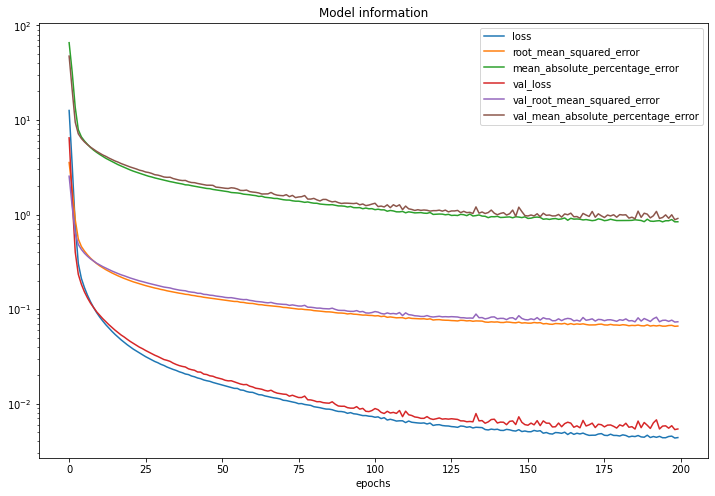

In [9]:
loss_df = pd.DataFrame(model.history.history)

loss_df.plot(figsize=(12,8))
plt.title("Model information")
plt.yscale('log')
plt.xlabel("epochs")
plt.show()

In [10]:
from sklearn import metrics

y_pred = model.predict(X_test)
var_score = metrics.explained_variance_score(y_test,y_pred)
# compute the accuracy of the model 
print('Variance score:', var_score)
print('\nRMSE:',loss_df['root_mean_squared_error'].tail(1))
print('\nLoss:',loss_df['loss'].tail(1))
print('\nMAPE:',loss_df['mean_absolute_percentage_error'].tail(1))

Variance score: 0.8198495567544508

RMSE: 199    0.066297
Name: root_mean_squared_error, dtype: float64

Loss: 199    0.004395
Name: loss, dtype: float64

MAPE: 199    0.83944
Name: mean_absolute_percentage_error, dtype: float64


### Model 2

In [11]:
#### verebeterpunten:
# validation data gebruiken
# k folds
# andere metrics voor aflezen
# adam vs andere andere sgd methods testen
# hidden layers toevoegen
# aantal nodes per layer aanpassen
# batchsize aanpassen (32, 64 of 128)
# aantal epochs 
# onze loss plotten